# Car Price Prediction (Linear Regression)


### 1. Import libraries and data set

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [132]:
#Load Dataset

car_df = pd.read_csv("car data.csv")
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 2. Preprocessing and data analysis

In [133]:
# Descriptive Statistics of Data
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [134]:
# Information of Data 
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Note :-** 
1. The dataset is clean and does not contain any missing values.
2. Dataset contain some categorical columns which needs to be converted into numberical column to build a regression model.
3. Some of the columns need to be renamed for better understanding. 
4. `Selling_Price` is our target column.

In [135]:
# Adding a new column "Age" extracted from Year column.
car_df["Age"] = 2025-car_df['Year']
car_df.drop(columns="Year", inplace =True)
car_df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [136]:
# Rename Columns
car_df.rename(columns = {'Selling_Price':'Selling_Price_lacs',
                          'Present_Price':'Present_Price_lacs',
                          'Owner':'Past_Owners'},inplace = True)
car_df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


### 3. Column Encoding using map function

In [137]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_Name             301 non-null    object 
 1   Selling_Price(lacs)  301 non-null    float64
 2   Present_Price(lacs)  301 non-null    float64
 3   Kms_Driven           301 non-null    int64  
 4   Fuel_Type            301 non-null    object 
 5   Seller_Type          301 non-null    object 
 6   Transmission         301 non-null    object 
 7   Past_Owners          301 non-null    int64  
 8   Age                  301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [138]:
cat_cols = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"]
car_df.Car_Name.value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [139]:
car_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [140]:
car_df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [141]:
car_df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

**Note :-** It is difficult and illogical to convert `Car_Name` column into numerical column hence we will only convert `Feul_Type`, `Seller_Type`, and `Transmission` columns

In [142]:
fuel_dict = {"Petrol":0, "Diesel":1, "CNG":2}
seller_dict = {"Dealer":0, 'Individual':1}
trans_dict = {"Manual":0, "Automatic":1}

car_df.Fuel_Type = car_df["Fuel_Type"].map(fuel_dict)
car_df.Seller_Type = car_df['Seller_Type'].map(seller_dict)
car_df.Transmission = car_df["Transmission"].map(trans_dict)

car_df


,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1,0,0,0,9
297,brio,4.00,5.90,60000,0,0,0,0,10
298,city,3.35,11.00,87934,0,0,0,0,16
299,city,11.50,12.50,9000,1,0,0,0,8


In [143]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_Name             301 non-null    object 
 1   Selling_Price(lacs)  301 non-null    float64
 2   Present_Price(lacs)  301 non-null    float64
 3   Kms_Driven           301 non-null    int64  
 4   Fuel_Type            301 non-null    int64  
 5   Seller_Type          301 non-null    int64  
 6   Transmission         301 non-null    int64  
 7   Past_Owners          301 non-null    int64  
 8   Age                  301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


Summary:- All the necessary columns have been converted into Numerical type. 

### 4. Model Building

#### 4.1. Data Splitting

In [144]:
from sklearn.model_selection import train_test_split
model_df = car_df.drop(labels = "Car_Name", axis = 1)

X = model_df.drop(columns="Selling_Price(lacs)")
y = model_df["Selling_Price(lacs)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [145]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (210, 7)
x test:  (91, 7)
y train:  (210,)
y test:  (91,)


#### 4.2. Model Training

In [146]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Train Score: ", lin_reg.score(X_train, y_train))
print("Test Score: ", lin_reg.score(X_test, y_test))

Train Score:  0.8761249192923504
Test Score:  0.8773175030338547


#### 4.3. Predictions and accuracy

In [147]:
from sklearn.metrics import r2_score
y_test_pred = lin_reg.predict(X_test)

r2_score(y_test, y_test_pred)

0.8773175030338547

### 5. Plotting

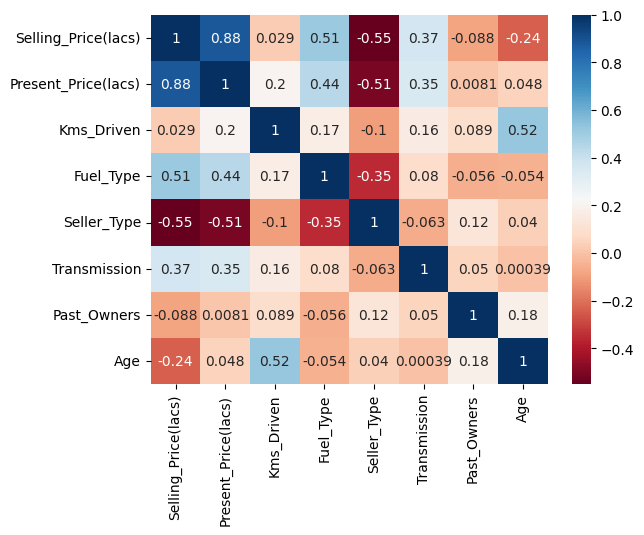

In [148]:
# Correlation Heatmap 
sns.heatmap(model_df.corr(), annot=True, cmap="RdBu")
plt.show()

In [149]:
# Check correlation of each column with target.
model_df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Fuel_Type              0.509467
Seller_Type           -0.550724
Transmission           0.367128
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

Now rebuild a linear regression with a single feature to make a regression line.. 

In [150]:
from sklearn.metrics import mean_squared_error

X1 = model_df[["Present_Price(lacs)"]]
y1 = model_df["Selling_Price(lacs)"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

lin_reg1 = LinearRegression()
lin_reg1.fit(X_train1, y_train1)
print(lin_reg1.score(X_train1, y_train1))

y_pred1 = lin_reg1.predict(X_test1)
print("Coefficients:", lin_reg1.coef_)
print("Intercept:", lin_reg.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test1, y_pred1))
print("R2 Score:", r2_score(y_test1, y_pred1))


0.7912190751012238
Coefficients: [0.50970327]
Intercept: 5.708643737157031
Mean Squared Error (MSE): 7.202032610310123
R2 Score: 0.6873518619001651


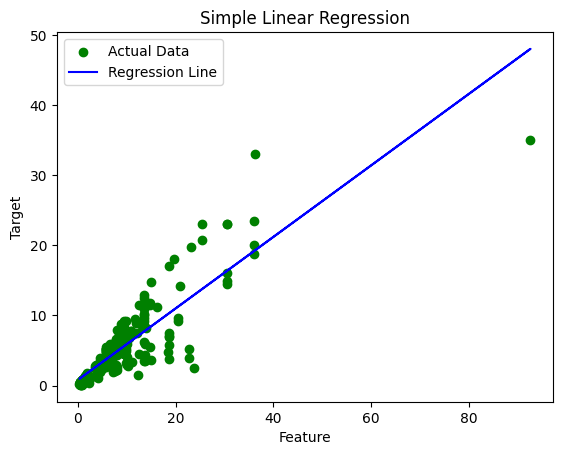

In [151]:
plt.scatter(X1, y1, color="g", label="Actual Data") 
plt.plot(X1, lin_reg1.predict(X1), color="b", label="Regression Line")  
plt.title("Simple Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()